
# CS5720: Neural Networks and Deep Learning (Spring 2025)
## ICP 5 - Problem 1
**Student Name:** Nidhin Ninan

**School:** University of Central Missouri

**Video Link:** https://drive.google.com/file/d/1l636ZoYFFJw2UFc5bbpVJbQfhV2eLXwG/view?usp=sharing



## **Problem Overview:**

 **Deep Learning Image Classification with CNN**
- Train a CNN model on CIFAR-10 dataset
- Evaluate its performance
- Predict the first 4 test images and compare with actual labels
- Visualize training loss and accuracy

In [22]:
# %% Import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.utils import to_categorical

Download the popular CIFAR-10 dataset for training a neural net. Then normalise the x,y pixel values and turn the labels into numerical categories using one-hot encoding.

In [23]:
# %% Set random seed and load CIFAR-10 data
seed = 7
np.random.seed(seed)

# Load CIFAR-10 data (50,000 training and 10,000 test images)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
num_classes = y_test.shape[1]


# **Model Architecture**

## **1. Convolutional Layers**
- **Convolutional Input Layer:** 32 filters, 3×3 kernel, ReLU activation, with kernel constraint.
- **Dropout Layer:** 20% dropout.
- **Convolutional Layer:** 32 filters, 3×3 kernel, ReLU activation.
- **Max Pooling Layer:** 2×2 pool.

- **Convolutional Layer:** 64 filters, 3×3 kernel, ReLU activation.
- **Dropout Layer:** 20% dropout.
- **Convolutional Layer:** 64 filters, 3×3 kernel, ReLU activation.
- **Max Pooling Layer:** 2×2 pool.

- **Convolutional Layer:** 128 filters, 3×3 kernel, ReLU activation.
- **Dropout Layer:** 20% dropout.
- **Convolutional Layer:** 128 filters, 3×3 kernel, ReLU activation.
- **Max Pooling Layer:** 2×2 pool.

## **2. Fully Connected Layers**
- **Flatten Layer:** Converts feature maps into a 1D vector.
- **Dropout Layer:** 20% dropout.
- **Fully Connected Layer:** 1024 units, ReLU activation.
- **Dropout Layer:** 20% dropout.
- **Fully Connected Layer:** 512 units, ReLU activation.
- **Dropout Layer:** 20% dropout.

## **3. Output Layer**
- **Fully Connected Output Layer:** 10 units, Softmax activation (for classification).


In [24]:
# %% Build the CNN model with the specified architecture
model = Sequential()

# 1. Convolutional Input Layer: 32 filters, 3x3 kernel, ReLU activation.
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), 
                 padding='same', activation='relu', 
                 kernel_constraint=MaxNorm(3)))
# 2. Dropout Layer: 20%
model.add(Dropout(0.2))
# 3. Convolutional Layer: 32 filters, 3x3 kernel, ReLU activation.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', 
                 kernel_constraint=MaxNorm(3)))
# 4. Max Pooling: 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5. Convolutional Layer: 64 filters, 3x3 kernel, ReLU activation.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', 
                 kernel_constraint=MaxNorm(3)))
# 6. Dropout Layer: 20%
model.add(Dropout(0.2))
# 7. Convolutional Layer: 64 filters, 3x3 kernel, ReLU activation.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', 
                 kernel_constraint=MaxNorm(3)))
# 8. Max Pooling: 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 9. Convolutional Layer: 128 filters, 3x3 kernel, ReLU activation.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', 
                 kernel_constraint=MaxNorm(3)))
# 10. Dropout Layer: 20%
model.add(Dropout(0.2))
# 11. Convolutional Layer: 128 filters, 3x3 kernel, ReLU activation.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', 
                 kernel_constraint=MaxNorm(3)))
# 12. Max Pooling: 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 13. Flatten the output
model.add(Flatten())
# 14. Dropout Layer: 20%
model.add(Dropout(0.2))
# 15. Fully Connected Layer: 1024 units, ReLU activation.
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
# 16. Dropout Layer: 20%
model.add(Dropout(0.2))
# 17. Fully Connected Layer: 512 units, ReLU activation.
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
# 18. Dropout Layer: 20%
model.add(Dropout(0.2))
# 19. Output Layer: 10 units, Softmax activation.
model.add(Dense(num_classes, activation='softmax'))

# Display model architecture
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
# %% Compile and train the model
# Set training parameters
epochs = 60
lrate = 0.01
decay = lrate / epochs

# Use Stochastic Gradient Descent optimizer
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model and store the history for later visualization
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=epochs, batch_size=32, verbose=1)


Epoch 1/60


2025-02-19 21:35:23.742364: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.2367 - loss: 2.0416 - val_accuracy: 0.4467 - val_loss: 1.4803
Epoch 2/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.4578 - loss: 1.4767 - val_accuracy: 0.5488 - val_loss: 1.2533
Epoch 3/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.5476 - loss: 1.2543 - val_accuracy: 0.6232 - val_loss: 1.0700
Epoch 4/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.6185 - loss: 1.0736 - val_accuracy: 0.6663 - val_loss: 0.9647
Epoch 5/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.6666 - loss: 0.9471 - val_accuracy: 0.6782 - val_loss: 0.9214
Epoch 6/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.6987 - loss: 0.8502 - val_accuracy: 0.7147 - val_loss: 0.8225
Epoch 7/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.7218 - loss: 0.7901 - val_accuracy: 0.7390 - val_loss: 0.7716
Epoch 8/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 62ms/step - accuracy: 0.7404 - loss: 0.7

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.7019 - loss: 0.9217 - val_accuracy: 0.6845 - val_loss: 0.9517
Epoch 51/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.6957 - loss: 0.9367 - val_accuracy: 0.5667 - val_loss: 1.2752
Epoch 52/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.6815 - loss: 0.9732 - val_accuracy: 0.6686 - val_loss: 1.0205
Epoch 53/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.6748 - loss: 0.9992 - val_accuracy: 0.6292 - val_loss: 1.1262
Epoch 54/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.6825 - loss: 0.9781 - val_accuracy: 0.6003 - val_loss: 1.2142
Epoch 55/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.6696 - loss: 1.0186 - val_accuracy: 0.6745 - val_loss: 1.0109
Epoch 56/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.6647 - loss: 1.0279 - val_accuracy: 0.5950 - val_loss: 1.2410
Epoch 57/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.6317 - los

Evaluate the model accuracy on the earlier partitioned test data on which training issn't done.

In [26]:
# %% Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

Test Accuracy: 58.22%


Pick the first 4 images from the dataset and then predict the image using the newly trained neural net. Then compare the results with actual labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted classes: [2 8 8 8]
Actual classes:    [3 8 8 0]


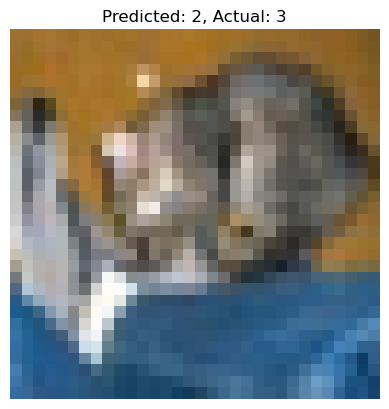

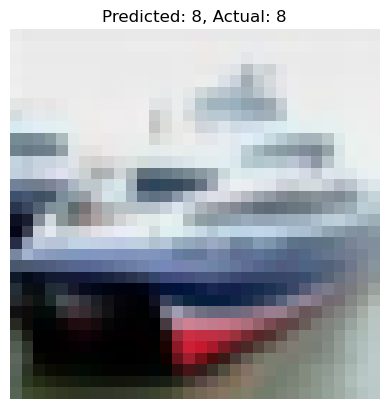

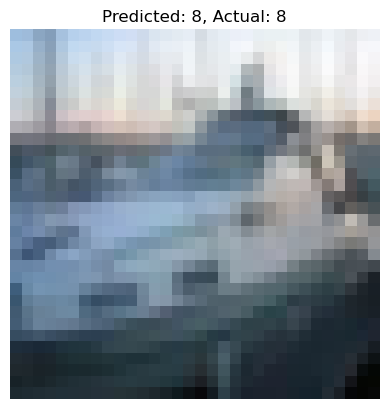

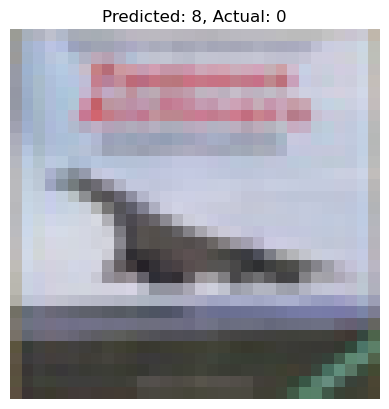

In [27]:
# %% Predict the first 4 test images and compare with actual labels
predictions = model.predict(X_test[:4])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:4], axis=1)

print("Predicted classes:", predicted_classes)
print("Actual classes:   ", actual_classes)

# Optionally, display the first 4 test images with their predicted and actual labels
for i in range(4):
    plt.figure()
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")
    plt.axis('off')
    plt.show()

Visualize the Loss and Accuarcy of the training as the training was done for each epoch.

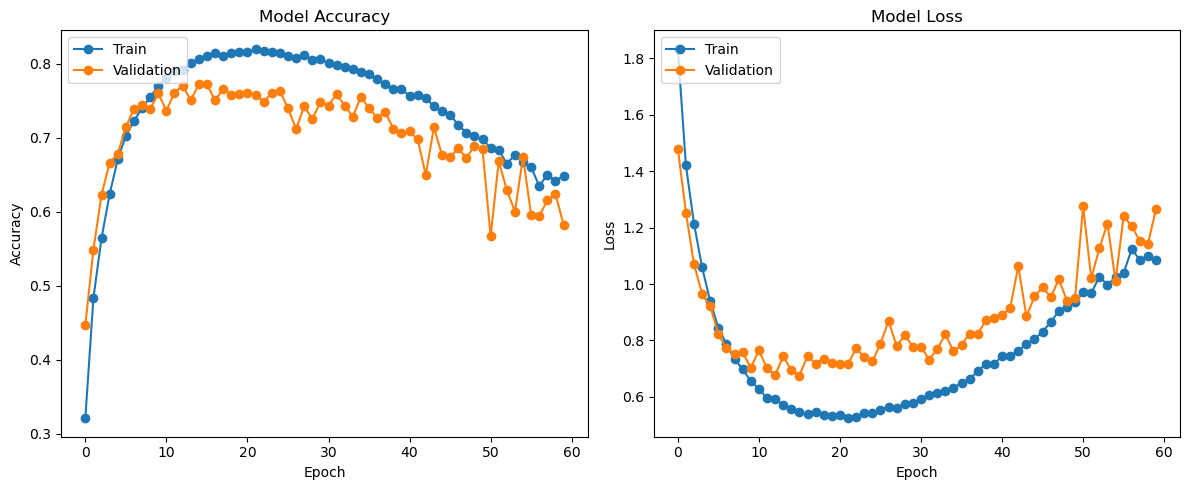

In [28]:
# %% Visualize Loss and Accuracy
# Plot training & validation accuracy and loss using the history object

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


**VIDEO LINK** : 
https://drive.google.com/file/d/1l636ZoYFFJw2UFc5bbpVJbQfhV2eLXwG/view?usp=sharing
